In [ ]:
교재 : p204~

In [1]:

import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
import tensorflow as  tf
import tensorflow.keras as keras

In [3]:
conv_base = keras.applications.VGG16(weights="imagenet",
                          include_top=False,   #dense층은 잘 안가져 온다. 훈련된 데이터만 들고 오는걸 include_top을 이용.
                          input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = './cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
train_features.shape , train_features.min() , train_features.max()

((2000, 4, 4, 512), 0.0, 10.988971710205078)

In [16]:
# (20000, 4 , 4 , 512) -> (20000, 4 * 4 * 512) 
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))   #2000개의 데이터, 4*4*512사이즈
validation_features = np.reshape(validation_features,(1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, 
                             input_shape=(4*4*512,), 
                             activation='relu'))
model.add(keras.layers.Dropout(0.5))                             
model.add(keras.layers.Dense(1,                              
                             activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy']
              )                   
history = model.fit(train_features, train_labels,
                    batch_size=20,
                    epochs=30,
                    validation_data=(validation_features, validation_labels))                          

Epoch 1/30
100/100 [==============================] - 3s 26ms/step - loss: 0.6164 - accuracy: 0.6540 - val_loss: 0.4474 - val_accuracy: 0.8420
Epoch 2/30
100/100 [==============================] - 2s 24ms/step - loss: 0.4340 - accuracy: 0.8075 - val_loss: 0.3640 - val_accuracy: 0.8640
Epoch 3/30
100/100 [==============================] - 2s 24ms/step - loss: 0.3626 - accuracy: 0.8460 - val_loss: 0.3206 - val_accuracy: 0.8800
Epoch 4/30
100/100 [==============================] - 2s 24ms/step - loss: 0.3233 - accuracy: 0.8610 - val_loss: 0.2964 - val_accuracy: 0.8920
Epoch 5/30
100/100 [==============================] - 2s 24ms/step - loss: 0.2962 - accuracy: 0.8740 - val_loss: 0.2810 - val_accuracy: 0.8900
Epoch 6/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2641 - accuracy: 0.8975 - val_loss: 0.2688 - val_accuracy: 0.8950
Epoch 7/30
100/100 [==============================] - 2s 24ms/step - loss: 0.2506 - accuracy: 0.9010 - val_loss: 0.2602 - val_accuracy: 0.8980

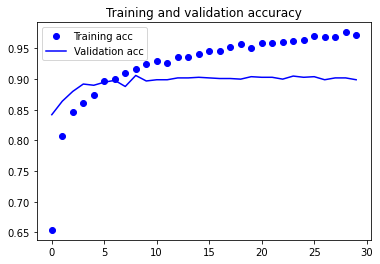

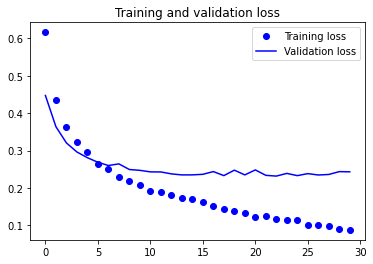

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
conv_base.trainable = False # 가중치 업데이트 금지

In [20]:
model2 = keras.models.Sequential()
model2.add(conv_base)
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [21]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
len(model2.trainable_weights)   #4개가 나와야함.

4

In [23]:
# 폴더에서 이미지 파일을 읽고 수치데이터로 인코딩 해주는 도구  (교재 p189)
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = train_gen.flow_from_directory( train_dir ,
                                          target_size=(150,150),  # 모든 이미지 크기를 150X150 으로 변경
                                          batch_size=20, #한번에 읽을 이미지 개수
                                          class_mode = 'binary'  # y값을 반환해 주는 모드 (이진분류)
                                          )

validation_gen = test_gen.flow_from_directory(  validation_dir ,
                                                target_size=(150,150),  # 모든 이미지 크기를 150X150 으로 변경
                                                batch_size=20, #한번에 읽을 이미지 개수
                                                class_mode = 'binary'  # y값을 반환해 주는 모드 (이진분류)
                                                )           

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
model2.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy']
              )                   
history = model2.fit(train_gen,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_gen,
                    validation_steps=50 )    

Epoch 1/30
100/100 [==============================] - 404s 4s/step - loss: 0.4116 - accuracy: 0.8045 - val_loss: 0.2470 - val_accuracy: 0.8910
Epoch 2/30
100/100 [==============================] - 400s 4s/step - loss: 0.2107 - accuracy: 0.9180 - val_loss: 0.1882 - val_accuracy: 0.9190
Epoch 3/30
100/100 [==============================] - 400s 4s/step - loss: 0.1475 - accuracy: 0.9435 - val_loss: 0.1791 - val_accuracy: 0.9200
Epoch 4/30
100/100 [==============================] - 399s 4s/step - loss: 0.0990 - accuracy: 0.9650 - val_loss: 0.1871 - val_accuracy: 0.9220
Epoch 5/30
100/100 [==============================] - 399s 4s/step - loss: 0.0640 - accuracy: 0.9785 - val_loss: 0.1884 - val_accuracy: 0.9250
Epoch 6/30
100/100 [==============================] - 400s 4s/step - loss: 0.0417 - accuracy: 0.9890 - val_loss: 0.2360 - val_accuracy: 0.9200
Epoch 7/30
100/100 [==============================] - 399s 4s/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.3484 - val_accuracy: 0.8870

In [28]:
conv_base = keras.applications.VGG16(weights="imagenet",
                          include_top=False,   #dense층은 잘 안가져 온다. 훈련된 데이터만 들고 오는걸 include_top을 이용.
                          input_shape=(150, 150, 3))

In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [29]:
conv_base.trainable = True

for layer in conv_base.layers:
    # print(layer.name, layer.trainable)
    if 'block5_c' in layer.name:
        # print(layer.name)
        layer.trainable = True
    else:
        layer.trainable = False

In [30]:
model2 = keras.models.Sequential()
model2.add(conv_base)
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(1, activation='sigmoid'))